In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn import datasets

In [4]:
wine  = datasets.load_wine()

In [6]:
wine.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [7]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [9]:
x = wine.data
y = wine.target

In [10]:
x.shape,y.shape

((178, 13), (178,))

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify = y)

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

## For n=3

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.6851851851851852


## For n=7

In [16]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.7407407407407407


## Scalling

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

### After Scaling Building KNN model

In [28]:
X_train, X_test, y_train, y_test =train_test_split(x_scaled,y,test_size=0.3,random_state=42,stratify = y)

knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9444444444444444


In [21]:
from sklearn.model_selection import cross_val_score

In [22]:
neighbours = list(range(1,50,2))
cv_score =[]

for k in neighbours:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn,x_scaled,y,cv =10,scoring='accuracy')
    cv_score.append(scores.mean())

In [39]:
cv_score

[0.9439735982112143,
 0.954499914000688,
 0.9666322669418644,
 0.9663398692810456,
 0.97218782249742,
 0.9718954248366012,
 0.9666322669418644,
 0.9666322669418644,
 0.9725146198830409,
 0.9725146198830409,
 0.9725146198830409,
 0.9833333333333334,
 0.9718954248366012,
 0.9660130718954247,
 0.9660130718954247,
 0.9660130718954247,
 0.9718954248366012,
 0.9718954248366012,
 0.9718954248366012,
 0.9663398692810456,
 0.9610767113863089,
 0.9610767113863089,
 0.9551943584451325,
 0.9551943584451325,
 0.9551943584451325]

In [24]:
MSE = [1-x for x in cv_score]
MSE

[0.05602640178878571,
 0.04550008599931199,
 0.03336773305813556,
 0.03366013071895435,
 0.027812177502580027,
 0.028104575163398815,
 0.03336773305813556,
 0.03336773305813556,
 0.027485380116959113,
 0.027485380116959113,
 0.027485380116959113,
 0.016666666666666607,
 0.028104575163398815,
 0.033986928104575265,
 0.033986928104575265,
 0.033986928104575265,
 0.028104575163398815,
 0.028104575163398815,
 0.028104575163398815,
 0.03366013071895435,
 0.0389232886136911,
 0.0389232886136911,
 0.04480564155486755,
 0.04480564155486755,
 0.04480564155486755]

In [25]:
optimal_k = neighbours[MSE.index(min(MSE))]
optimal_k

23

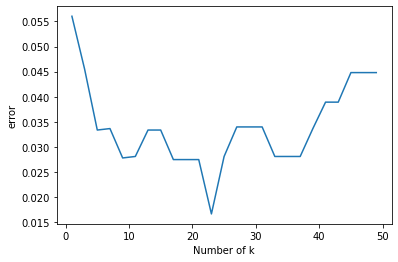

In [26]:
plt.plot(neighbours,MSE)
plt.xlabel('Number of k')
plt.ylabel('error')
plt.show()

In [30]:
X_train, X_test, y_train, y_test =train_test_split(x_scaled,y,test_size=0.3,random_state=42,stratify = y)

knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print('Accuracy:',metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9814814814814815
